In [4]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

[*********************100%***********************]  1 of 1 completed


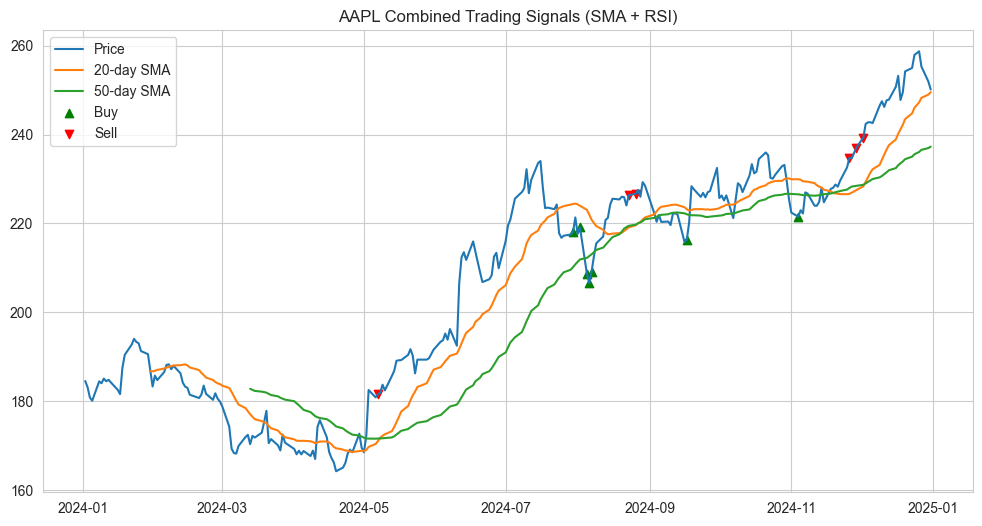

In [6]:
# Get data
ticker = "AAPL"
df = yf.download(ticker, start="2024-01-01", end="2025-01-01")
sns.set_style("whitegrid")

# Moving Averages
df['SMA_20'] = df['Close'].rolling(20).mean()
df['SMA_50'] = df['Close'].rolling(50).mean()

# RSI Calculation
delta = df['Close'].diff(1)
gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)
rs = gain.rolling(14).mean() / loss.rolling(14).mean()
df['RSI'] = 100 - (100 / (1 + rs))

# Signals
df['Buy'] = (df['SMA_20'] > df['SMA_50']) & (df['RSI'] < 30)
df['Sell'] = (df['SMA_20'] < df['SMA_50']) & (df['RSI'] > 70)

# Plot
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Price')
plt.plot(df['SMA_20'], label='20-day SMA')
plt.plot(df['SMA_50'], label='50-day SMA')
plt.scatter(df.index[df['Buy']], df['Close'][df['Buy']], color='green', marker='^', label='Buy')
plt.scatter(df.index[df['Sell']], df['Close'][df['Sell']], color='red', marker='v', label='Sell')
plt.title(f'{ticker} Combined Trading Signals (SMA + RSI)')
plt.legend()
plt.show()
